# Всем доброго дня.
***
### Это мой третий учебный проект
### В нём я буду оптимизировать датасет, посвящённый отзывам к различным отелям сайта Booking.com с целью выяснения закономерностей и отклонений.
### Мои задачи заключаются в следующем:
* Обработать данные
* По максимуму перевести строчные данные в числовые
* Создать новые признаки
* Повысить эффективность модели по предсказанию рейтинга отеля
#### Вперёд!

In [3945]:
import pandas as pd

In [3946]:
# Читаем данные
hotels = pd.read_csv('data/hotels.csv')
#hotels = pd.read_csv('https://dl.dropboxusercontent.com/s/nex7vvntrhfj9h0/hotels.csv?dl=0')
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

Для начала избавимся от дубликатов.

In [3947]:
dupl_columns = list(hotels.columns)

dupl = hotels.duplicated(subset=dupl_columns)
h_duplicates = hotels[dupl]
print(f'Found duplicates:{h_duplicates.shape[0]}')

Found duplicates:307


Поскольку данная операция ухудшает финальную метрику, проводить я её не стану. Однако, на мой взгляд, она логически целесообразна.

In [3948]:
#hotels = hotels.drop_duplicates(subset=dupl_columns)
print(f'Total: {hotels.shape[0]}')

Total: 386803


In [3949]:
# Переводим дату во временной формат
hotels['review_date'] = pd.to_datetime(hotels['review_date'], format='%m/%d/%Y')

Сравним среднюю и медианную оценку отелей по версии гостей.

In [3950]:
hotels['reviewer_score'].mean()

8.396906435575733

In [3951]:
hotels['reviewer_score'].median()

8.8

Медиана выше среднего. Это говорит о том, что положительных отзывов гораздо больше, чем отрицательных.

In [3952]:
# Узнаём общее число отелей
hotels['hotel_name'].value_counts().head(20)

Britannia International Hotel Canary Wharf           3587
Strand Palace Hotel                                  3206
Park Plaza Westminster Bridge London                 3095
Copthorne Tara Hotel London Kensington               2688
DoubleTree by Hilton Hotel London Tower of London    2379
Grand Royale London Hyde Park                        2218
Holiday Inn London Kensington                        2097
Hilton London Metropole                              1982
Intercontinental London The O2                       1939
Millennium Gloucester Hotel London                   1889
Park Grand Paddington Court                          1737
Hilton London Wembley                                1708
Park Plaza County Hall London                        1700
Park Plaza London Riverbank                          1633
Blakemore Hyde Park                                  1632
M by Montcalm Shoreditch London Tech City            1626
DoubleTree by Hilton London Docklands Riverside      1600
St James Court

Теперь я займусь именами отелей, а именно постараюсь найти самые часто встречающие слова в них и выяснить их влияние на оценку отеля.

In [3953]:
hotels['hotel_name_n'] = hotels['hotel_name'].str.split()

In [3954]:
name = hotels.explode('hotel_name_n')

In [3955]:
386496/2

193248.0

Для данного датафрейма, 193248 является идеальным числом. На мой взгляд, если какое-то слово встречается в половине отзывов, а его наличие создаёт существенное изменение в оценке отеля, то создание такого признака будет максимально эффективным методом улучшения качества модели.

In [3956]:
name['hotel_name_n'].value_counts().head(20)

Hotel         175743
London        103139
The            43439
Park           32959
Amsterdam      29970
Hilton         26710
by             18330
Plaza          17367
Paris          16322
Inn            13831
Grand          13793
Kensington     13762
City           13336
Barcelona      13305
Holiday        11925
DoubleTree     11407
Best           11325
Western        11325
tel            11143
H              10519
Name: hotel_name_n, dtype: int64

Проведём опыты с раличными словами, встречающимися с во многих названиях отелей и сравним сренюю оценку отзыва при их наличии и отсутствии.

In [3957]:
search = ['Hotel']
hotels['Hotel'] = hotels['hotel_name'].apply(lambda x: 1 if any(i in x for i in search) else 0)
check_p = hotels[hotels['Hotel']==1]
check_n = hotels[hotels['Hotel']==0]
display(round(check_p['reviewer_score'].mean(), 2), round(check_n['reviewer_score'].mean(), 2))

8.35

8.44

In [3958]:
search = ['London']
hotels['London'] = hotels['hotel_name'].apply(lambda x: 1 if any(i in x for i in search) else 0)
check_p = hotels[hotels['London']==1]
check_n = hotels[hotels['London']==0]
display(round(check_p['reviewer_score'].mean(), 2), round(check_n['reviewer_score'].mean(), 2))

8.39

8.4

In [3959]:
search = ['The']
hotels['The'] = hotels['hotel_name'].apply(lambda x: 1 if any(i in x for i in search) else 0)
check_p = hotels[hotels['The']==1]
check_n = hotels[hotels['The']==0]
display(round(check_p['reviewer_score'].mean(), 2), round(check_n['reviewer_score'].mean(), 2))

8.63

8.37

In [3960]:
search = ['Park']
hotels['Park'] = hotels['hotel_name'].apply(lambda x: 1 if any(i in x for i in search) else 0)
check_p = hotels[hotels['Park']==1]
check_n = hotels[hotels['Park']==0]
display(round(check_p['reviewer_score'].mean(), 2), round(check_n['reviewer_score'].mean(), 2))

8.16

8.42

In [3961]:
search = ['Amsterdam']
hotels['Amsterdam'] = hotels['hotel_name'].apply(lambda x: 1 if any(i in x for i in search) else 0)
check_p = hotels[hotels['Amsterdam']==1]
check_n = hotels[hotels['Amsterdam']==0]
display(round(check_p['reviewer_score'].mean(), 2), round(check_n['reviewer_score'].mean(), 2))

8.39

8.4

Избавляемся от признаков, которые практически никак не влияют на оценку гостя, а также от базового признака. 

In [3962]:
hotels = hotels.drop('hotel_name', axis=1)
hotels = hotels.drop('Hotel', axis=1)
hotels = hotels.drop('London', axis=1)
hotels = hotels.drop('Amsterdam', axis=1)
hotels = hotels.drop('The', axis=1)
hotels = hotels.drop('Park', axis=1)

In [3963]:
# Узнаём дату первого отзыва
hotels['review_date'].min()

Timestamp('2015-08-04 00:00:00')

In [3964]:
# Узнаём дату последнего отзыва
hotels['review_date'].max()

Timestamp('2017-08-03 00:00:00')

Проведём те же самые манипуляции с положительными и отрицательными отзывами.

In [3965]:
hotels['good_rev_n'] = hotels['positive_review'].str.split()

In [3966]:
good = hotels.explode('good_rev_n')

In [3967]:
good['good_rev_n'].value_counts().head(20)

and         312878
the         262144
was         175816
to          140350
The         122986
a           117295
staff       115420
very        113325
location    103825
room         92838
in           84037
hotel        83898
of           79636
is           76526
were         68170
for          67590
good         63767
helpful      54771
friendly     54247
with         49180
Name: good_rev_n, dtype: int64

In [3968]:
search = ['the']
hotels['p_the'] = hotels['positive_review'].apply(lambda x: 1 if any(i in x for i in search) else 0)
check_p = hotels[hotels['p_the']==1]
check_n = hotels[hotels['p_the']==0]
display(round(check_p['reviewer_score'].mean(), 2), round(check_n['reviewer_score'].mean(), 2))

8.74

8.2

In [3969]:
search = ['was']
hotels['p_was'] = hotels['positive_review'].apply(lambda x: 1 if any(i in x for i in search) else 0)
check_p = hotels[hotels['p_was']==1]
check_n = hotels[hotels['p_was']==0]
display(round(check_p['reviewer_score'].mean(), 2), round(check_n['reviewer_score'].mean(), 2))

8.67

8.29

In [3970]:
search = ['to']
hotels['p_to'] = hotels['positive_review'].apply(lambda x: 1 if any(i in x for i in search) else 0)
check_p = hotels[hotels['p_to']==1]
check_n = hotels[hotels['p_to']==0]
display(round(check_p['reviewer_score'].mean(), 2), round(check_n['reviewer_score'].mean(), 2))

8.76

8.25

In [3971]:
search = ['The']
hotels['p_The'] = hotels['positive_review'].apply(lambda x: 1 if any(i in x for i in search) else 0)
check_p = hotels[hotels['p_The']==1]
check_n = hotels[hotels['p_The']==0]
display(round(check_p['reviewer_score'].mean(), 2), round(check_n['reviewer_score'].mean(), 2))

8.64

8.32

In [3972]:
search = ['staff']
hotels['p_staff'] = hotels['positive_review'].apply(lambda x: 1 if any(i in x for i in search) else 0)
check_p = hotels[hotels['p_staff']==1]
check_n = hotels[hotels['p_staff']==0]
display(round(check_p['reviewer_score'].mean(), 2), round(check_n['reviewer_score'].mean(), 2))

8.97

8.16

In [3973]:
search = ['very']
hotels['p_very'] = hotels['positive_review'].apply(lambda x: 1 if any(i in x for i in search) else 0)
check_p = hotels[hotels['p_very']==1]
check_n = hotels[hotels['p_very']==0]
display(round(check_p['reviewer_score'].mean(), 2), round(check_n['reviewer_score'].mean(), 2))

8.94

8.19

In [3974]:
search = ['location']
hotels['p_location'] = hotels['positive_review'].apply(lambda x: 1 if any(i in x for i in search) else 0)
check_p = hotels[hotels['p_location']==1]
check_n = hotels[hotels['p_location']==0]
display(round(check_p['reviewer_score'].mean(), 2), round(check_n['reviewer_score'].mean(), 2))

8.6

8.32

In [3975]:
search = ['room']
hotels['p_room'] = hotels['positive_review'].apply(lambda x: 1 if any(i in x for i in search) else 0)
check_p = hotels[hotels['p_room']==1]
check_n = hotels[hotels['p_room']==0]
display(round(check_p['reviewer_score'].mean(), 2), round(check_n['reviewer_score'].mean(), 2))

8.81

8.24

In [3976]:
search = ['hotel']
hotels['p_hotel'] = hotels['positive_review'].apply(lambda x: 1 if any(i in x for i in search) else 0)
check_p = hotels[hotels['p_hotel']==1]
check_n = hotels[hotels['p_hotel']==0]
display(round(check_p['reviewer_score'].mean(), 2), round(check_n['reviewer_score'].mean(), 2))

8.92

8.28

In [3977]:
hotels = hotels.drop('positive_review', axis=1)

In [3978]:
hotels['bad_rev_n'] = hotels['negative_review'].str.split()

In [3979]:
bad = hotels.explode('bad_rev_n')

In [3980]:
bad['bad_rev_n'].value_counts().head(20)

the         317396
was         175361
to          170446
a           164602
and         161221
in          123345
room        116375
No          115654
Negative     95918
of           90107
for          85585
not          84570
I            84025
The          79954
it           66649
is           61318
we           55182
t            53945
but          52824
very         51800
Name: bad_rev_n, dtype: int64

In [3981]:
search = ['the']
hotels['n_the'] = hotels['negative_review'].apply(lambda x: 1 if any(i in x for i in search) else 0)
check_p = hotels[hotels['n_the']==1]
check_n = hotels[hotels['n_the']==0]
display(round(check_p['reviewer_score'].mean(), 2), round(check_n['reviewer_score'].mean(), 2))

7.77

8.77

In [3982]:
search = ['was']
hotels['n_was'] = hotels['negative_review'].apply(lambda x: 1 if any(i in x for i in search) else 0)
check_p = hotels[hotels['n_was']==1]
check_n = hotels[hotels['n_was']==0]
display(round(check_p['reviewer_score'].mean(), 2), round(check_n['reviewer_score'].mean(), 2))

7.76

8.64

In [3983]:
search = ['to']
hotels['n_to'] = hotels['negative_review'].apply(lambda x: 1 if any(i in x for i in search) else 0)
check_p = hotels[hotels['n_to']==1]
check_n = hotels[hotels['n_to']==0]
display(round(check_p['reviewer_score'].mean(), 2), round(check_n['reviewer_score'].mean(), 2))

7.72

8.69

In [3984]:
search = ['a']
hotels['n_a'] = hotels['negative_review'].apply(lambda x: 1 if any(i in x for i in search) else 0)
check_p = hotels[hotels['n_a']==1]
check_n = hotels[hotels['n_a']==0]
display(round(check_p['reviewer_score'].mean(), 2), round(check_n['reviewer_score'].mean(), 2))

8.33

8.98

In [3985]:
search = ['and']
hotels['n_and'] = hotels['negative_review'].apply(lambda x: 1 if any(i in x for i in search) else 0)
check_p = hotels[hotels['n_and']==1]
check_n = hotels[hotels['n_and']==0]
display(round(check_p['reviewer_score'].mean(), 2), round(check_n['reviewer_score'].mean(), 2))

7.46

8.73

In [3986]:
search = ['in']
hotels['n_in'] = hotels['negative_review'].apply(lambda x: 1 if any(i in x for i in search) else 0)
check_p = hotels[hotels['n_in']==1]
check_n = hotels[hotels['n_in']==0]
display(round(check_p['reviewer_score'].mean(), 2), round(check_n['reviewer_score'].mean(), 2))

8.02

8.79

In [3987]:
search = ['room']
hotels['n_room'] = hotels['negative_review'].apply(lambda x: 1 if any(i in x for i in search) else 0)
check_p = hotels[hotels['n_room']==1]
check_n = hotels[hotels['n_room']==0]
display(round(check_p['reviewer_score'].mean(), 2), round(check_n['reviewer_score'].mean(), 2))

7.48

8.74

In [3988]:
search = ['No']
hotels['n_No'] = hotels['negative_review'].apply(lambda x: 1 if any(i in x for i in search) else 0)
check_p = hotels[hotels['n_No']==1]
check_n = hotels[hotels['n_No']==0]
display(round(check_p['reviewer_score'].mean(), 2), round(check_n['reviewer_score'].mean(), 2))

9.03

8.01

In [3989]:
search = ['Negative']
hotels['n_Negative'] = hotels['negative_review'].apply(lambda x: 1 if any(i in x for i in search) else 0)
check_p = hotels[hotels['n_Negative']==1]
check_n = hotels[hotels['n_Negative']==0]
display(round(check_p['reviewer_score'].mean(), 2), round(check_n['reviewer_score'].mean(), 2))

9.34

8.09

In [3990]:
hotels = hotels.drop('negative_review', axis=1)

Теперь проведём те же самые манипуляции с тегами.

In [3991]:
def rev_func(num_tags):
    num_tags = num_tags[2:-2]
    res = num_tags.strip().split(' \', \' ')
    return res

hotels['tags_n'] = hotels['tags'].apply(rev_func)

In [3992]:
tags = hotels.explode('tags_n')
display(f'Total number of tags: {len(tags["tags_n"].unique())}')

'Total number of tags: 2368'

In [3993]:
tags['tags_n'].value_counts().head(10)

Leisure trip                      313593
Submitted from a mobile device    230778
Couple                            189212
Stayed 1 night                    145373
Stayed 2 nights                   100263
Solo traveler                      81235
Stayed 3 nights                    72000
Business trip                      61989
Group                              49088
Family with young children         45836
Name: tags_n, dtype: int64

In [3994]:
search = ['Leisure trip']
hotels['leisure_trip'] = hotels['tags_n'].apply(lambda x: 1 if any(i in x for i in search) else 0)
check_p = hotels[hotels['leisure_trip']==1]
check_n = hotels[hotels['leisure_trip']==0]
display(round(check_p['reviewer_score'].mean(), 2), round(check_n['reviewer_score'].mean(), 2))

8.49

8.0

In [3995]:
search = ['Submitted from a mobile device']
hotels['mobile'] = hotels['tags_n'].apply(lambda x: 1 if any(i in x for i in search) else 0)
check_p = hotels[hotels['mobile']==1]
check_n = hotels[hotels['mobile']==0]
display(round(check_p['reviewer_score'].mean(), 2), round(check_n['reviewer_score'].mean(), 2))

8.42

8.37

In [3996]:
search = ['Couple']
hotels['couple'] = hotels['tags_n'].apply(lambda x: 1 if any(i in x for i in search) else 0)
check_p = hotels[hotels['couple']==1]
check_n = hotels[hotels['couple']==0]
display(round(check_p['reviewer_score'].mean(), 2), round(check_n['reviewer_score'].mean(), 2))

8.51

8.28

In [3997]:
search = ['Stayed 1 night']
hotels['one_night'] = hotels['tags_n'].apply(lambda x: 1 if any(i in x for i in search) else 0)
check_p = hotels[hotels['one_night']==1]
check_n = hotels[hotels['one_night']==0]
display(round(check_p['reviewer_score'].mean(), 2), round(check_n['reviewer_score'].mean(), 2))

8.41

8.39

In [3998]:
search = ['Stayed 2 nights']
hotels['two_nights'] = hotels['tags_n'].apply(lambda x: 1 if any(i in x for i in search) else 0)
check_p = hotels[hotels['two_nights']==1]
check_n = hotels[hotels['two_nights']==0]
display(round(check_p['reviewer_score'].mean(), 2), round(check_n['reviewer_score'].mean(), 2))

8.39

8.4

In [3999]:
search = ['Stayed 3 nights']
hotels['three_nights'] = hotels['tags_n'].apply(lambda x: 1 if any(i in x for i in search) else 0)
check_p = hotels[hotels['three_nights']==1]
check_n = hotels[hotels['three_nights']==0]
display(round(check_p['reviewer_score'].mean(), 2), round(check_n['reviewer_score'].mean(), 2))

8.43

8.39

In [4000]:
search = ['Business trip']
hotels['business_trip'] = hotels['tags_n'].apply(lambda x: 1 if any(i in x for i in search) else 0)
check_p = hotels[hotels['business_trip']==1]
check_n = hotels[hotels['business_trip']==0]
display(round(check_p['reviewer_score'].mean(), 2), round(check_n['reviewer_score'].mean(), 2))

7.97

8.48

In [4001]:
hotels = hotels.drop('tags', axis=1)
hotels = hotels.drop('mobile', axis=1)
hotels = hotels.drop('one_night', axis=1)
hotels = hotels.drop('two_nights', axis=1)
hotels = hotels.drop('three_nights', axis=1)

Далее я решил провести закономерность между национальностью гостя отеля, оставившего отзыв с его оценкой.

In [4002]:
# Приведём названия стран к стандартному коду для построения карты средней оценки отзыва

import numpy as np
import pycountry

def do_fuzzy_search(country):
    try:
        result = pycountry.countries.search_fuzzy(country)
    except Exception:
        return np.nan
    else:
        return result[0].alpha_3

iso_map = {country: do_fuzzy_search(country) for country in hotels["reviewer_nationality"].unique()}
hotels["country_code"] = hotels['reviewer_nationality'].map(iso_map)

In [4003]:
# Заметим, что некоторые названия стран написаны не в соответствии со стандартом ISO.
miss = hotels[hotels['country_code'].isnull()]
miss['reviewer_nationality'].value_counts()

 Abkhazia Georgia                     116
 Macau                                 77
 Palestinian Territory                 41
 Cura ao                               29
 Ivory Coast                           15
 Turks Caicos Islands                  12
 Antigua Barbuda                       12
 U S Virgin Islands                    11
 Swaziland                              7
 Laos                                   6
 St Maarten                             6
 Democratic Republic of the Congo       6
 Falkland Islands Malvinas              5
 Crimea                                 4
 East Timor                             4
 Central Africa Republic                3
 St Pierre and Miquelon                 2
 Cocos K I                              2
 Saint Vincent Grenadines               1
 Bonaire St Eustatius and Saba          1
 Svalbard Jan Mayen                     1
 Saint Barts                            1
Name: reviewer_nationality, dtype: int64

In [4004]:
# Переименуем такие названия
hotels['reviewer_nationality'] = hotels['reviewer_nationality'].str.replace(r'Abkhazia Georgia', 'Georgia', regex= True)
hotels['reviewer_nationality'] = hotels['reviewer_nationality'].str.replace(r'Macau', 'Macao', regex= True)
hotels['reviewer_nationality'] = hotels['reviewer_nationality'].str.replace(r'Cura ao', 'Curaçao', regex= True)
hotels['reviewer_nationality'] = hotels['reviewer_nationality'].str.replace(r'Palestinian Territory', 'Palestine, State of', regex= True)
hotels['reviewer_nationality'] = hotels['reviewer_nationality'].str.replace(r'Ivory Coast', "Côte d'Ivoire", regex= True)
hotels['reviewer_nationality'] = hotels['reviewer_nationality'].str.replace(r'Turks Caicos Islands', 'Turks and Caicos Islands', regex= True)
hotels['reviewer_nationality'] = hotels['reviewer_nationality'].str.replace(r'Antigua Barbuda', 'Antigua and Barbuda', regex= True)
hotels['reviewer_nationality'] = hotels['reviewer_nationality'].str.replace(r'Laos', "Lao People's Democratic Republic", regex= True)
hotels['reviewer_nationality'] = hotels['reviewer_nationality'].str.replace(r'Democratic Republic of the Congo', 'Congo, the Democratic Republic of the', regex= True)
hotels['reviewer_nationality'] = hotels['reviewer_nationality'].str.replace(r'Central Africa Republic', "Central African Republic", regex= True)
hotels['reviewer_nationality'] = hotels['reviewer_nationality'].str.replace(r'U S Virgin Islands', 'Virgin Islands, U.S.', regex= True)
hotels['reviewer_nationality'] = hotels['reviewer_nationality'].str.replace(r'Swaziland', 'SZ', regex= True)
hotels['reviewer_nationality'] = hotels['reviewer_nationality'].str.replace(r'St Maarten', 'Sint Maarten (Dutch part)', regex= True)
hotels['reviewer_nationality'] = hotels['reviewer_nationality'].str.replace(r'Falkland Islands Malvinas', 'Falkland Islands (Malvinas)', regex= True)
hotels['reviewer_nationality'] = hotels['reviewer_nationality'].str.replace(r'East Timor', 'Timor-Leste', regex= True)
hotels['reviewer_nationality'] = hotels['reviewer_nationality'].str.replace(r'St Pierre and Miquelon', 'Saint Pierre and Miquelon', regex= True)
hotels['reviewer_nationality'] = hotels['reviewer_nationality'].str.replace(r'Cocos K I', 'Cocos (Keeling) Islands', regex= True)
hotels['reviewer_nationality'] = hotels['reviewer_nationality'].str.replace(r'Bonaire St Eustatius and Saba', 'Bonaire, Sint Eustatius and Saba', regex= True)
hotels['reviewer_nationality'] = hotels['reviewer_nationality'].str.replace(r'Svalbard Jan Mayen', 'Svalbard and Jan Mayen', regex= True)
hotels['reviewer_nationality'] = hotels['reviewer_nationality'].str.replace(r'Saint Barts', 'Saint Barthélemy', regex= True)
hotels['reviewer_nationality'] = hotels['reviewer_nationality'].str.replace(r'Saint Vincent Grenadines', 'Saint Vincent and the Grenadines', regex= True)
hotels['reviewer_nationality'] = hotels['reviewer_nationality'].str.replace(r'Crimea', 'Ukraine', regex= True)

In [4005]:
# Проделаем преобразование ещё раз
iso_map = {country: do_fuzzy_search(country) for country in hotels["reviewer_nationality"].unique()}
hotels["country_code"] = hotels['reviewer_nationality'].map(iso_map)

In [4006]:
# Строим карту количества отзывов в разных странах
import plotly
import plotly.express as px
choropleth_data = hotels.groupby('country_code')['reviewer_score'].count()
fig = px.choropleth(
    data_frame=choropleth_data,
    locations=choropleth_data.index,
    locationmode = 'ISO-3',
    color='reviewer_score',
    range_color=[1, 10000], 
    title='Number of Reviews in Different Countries', 
    width=1100, 
    height=700, 
    color_continuous_scale=[[0, 'rgb(255,255,255)'], [1, 'rgb(0,0,255)']]
)

fig.show()

Здесь, на мой взгляд существенную роль играют население страны и его благосостояние.

In [4007]:
# Строим карту средней оценки отелей в зависимости от национальности гостя
import plotly
import plotly.express as px
choropleth_data = hotels.groupby('country_code')['reviewer_score'].mean()
fig = px.choropleth(
    data_frame=choropleth_data,
    locations=choropleth_data.index,
    locationmode = 'ISO-3',
    color='reviewer_score',
    range_color=[7, 9], 
    title='Average Score from Guests in Different Countries', 
    width=1100, 
    height=700, 
    color_continuous_scale=[[0, 'rgb(255,0,0)'], [1, 'rgb(0,255,0)']]
)

fig.show()

В целом, каких-либо аномальностей я не обнаружил. В разных частях света разные средние оценки. Слишком явных перекосов не наблюдается.

In [4008]:
# Избавимся от ненужного столбца
hotels = hotels.drop('reviewer_nationality', axis=1)

Далее распределим отели по их стране нахождения.

In [4009]:
# Выбираем последнее слово из адреса отеля
hotels['hotel_country'] = hotels['hotel_address'].str.split().str[-1]

In [4010]:
hotels['hotel_country'].value_counts()

Kingdom        196774
Spain           45132
France          44830
Netherlands     43006
Austria         29178
Italy           27883
Name: hotel_country, dtype: int64

In [4011]:
# Меняем название на номерной код страны согласно формату ISO
hotels['hotel_country'] = hotels['hotel_country'].str.replace(r'Kingdom', '826', regex= True)
hotels['hotel_country'] = hotels['hotel_country'].str.replace(r'Spain', '724', regex= True)
hotels['hotel_country'] = hotels['hotel_country'].str.replace(r'France', '250', regex= True)
hotels['hotel_country'] = hotels['hotel_country'].str.replace(r'Netherlands', '528', regex= True)
hotels['hotel_country'] = hotels['hotel_country'].str.replace(r'Austria', '040', regex= True)
hotels['hotel_country'] = hotels['hotel_country'].str.replace(r'Italy', '380', regex= True)
hotels['hotel_country'] = hotels['hotel_country'].astype(int)

In [4012]:
# Для построения карты добавляем буквенный код страны
hotels['hotel_country_code'] = hotels['hotel_country'].astype(str)
hotels['hotel_country_code'] = hotels['hotel_country_code'].str.replace(r'826', 'GBR', regex= True)
hotels['hotel_country_code'] = hotels['hotel_country_code'].str.replace(r'724', 'ESP', regex= True)
hotels['hotel_country_code'] = hotels['hotel_country_code'].str.replace(r'250', 'FRA', regex= True)
hotels['hotel_country_code'] = hotels['hotel_country_code'].str.replace(r'528', 'NLD', regex= True)
hotels['hotel_country_code'] = hotels['hotel_country_code'].str.replace(r'40', 'AUT', regex= True)
hotels['hotel_country_code'] = hotels['hotel_country_code'].str.replace(r'380', 'ITA', regex= True)

In [4013]:
# Строим карту средней оценки отелей в разных странах
choropleth_data2 = hotels.groupby('hotel_country_code')['reviewer_score'].mean()
fig = px.choropleth(
    data_frame=choropleth_data2,
    locations=choropleth_data2.index,
    locationmode = 'ISO-3',
    color='reviewer_score',
    range_color=[8.3, 8.6], 
    title='Number of Hotels', 
    width=1100, 
    height=700, 
    color_continuous_scale=[[0, 'rgb(255,0,0)'], [1, 'rgb(0,255,0)']]
)

fig.show()

В целом, разница в оценках не сильно велика, однако заметно, что испанские отели пользуются большей популярностью, нежели чем британские.

In [4014]:
# Удаляем ненужный признак
hotels = hotels.drop('hotel_address', axis=1)

Далее построим различные графики согласно дат отзывов

Text(0.5, 1.0, 'Количество отзывов согласно дате')

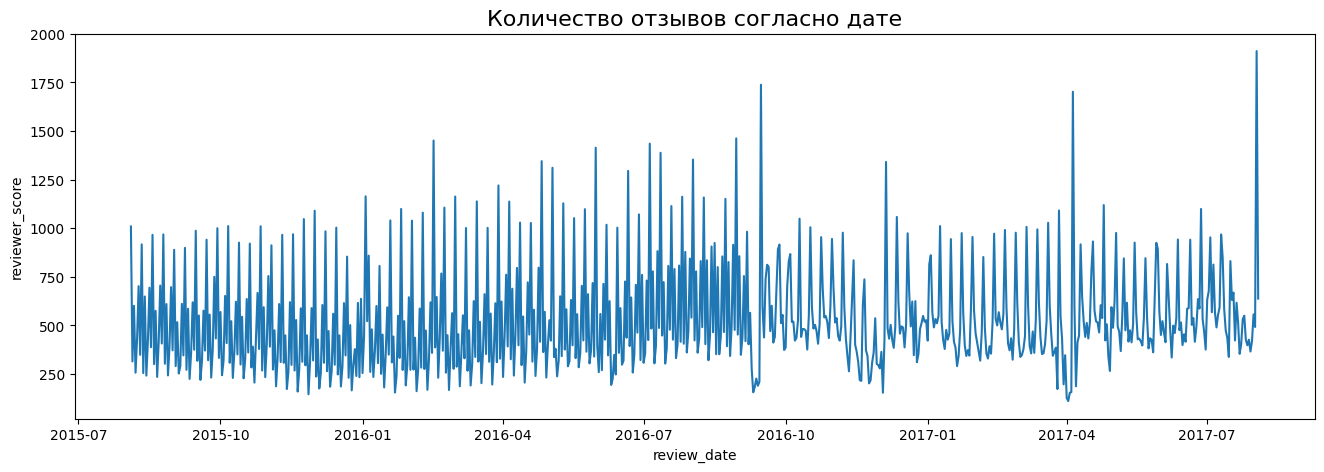

In [4015]:
import matplotlib.pyplot as plt
import seaborn as sns

date = hotels.groupby('review_date')['reviewer_score'].count()
line,ax = plt.subplots(figsize=(16, 5)) 
ax = sns.lineplot(data=date)
ax.set_title('Количество отзывов согласно дате', fontsize=16)

В целом график относительно ровный, сложно обнаружить какие-либо отклонения.

Text(0.5, 1.0, 'Распределение средней оценки отзыва согласно дате')

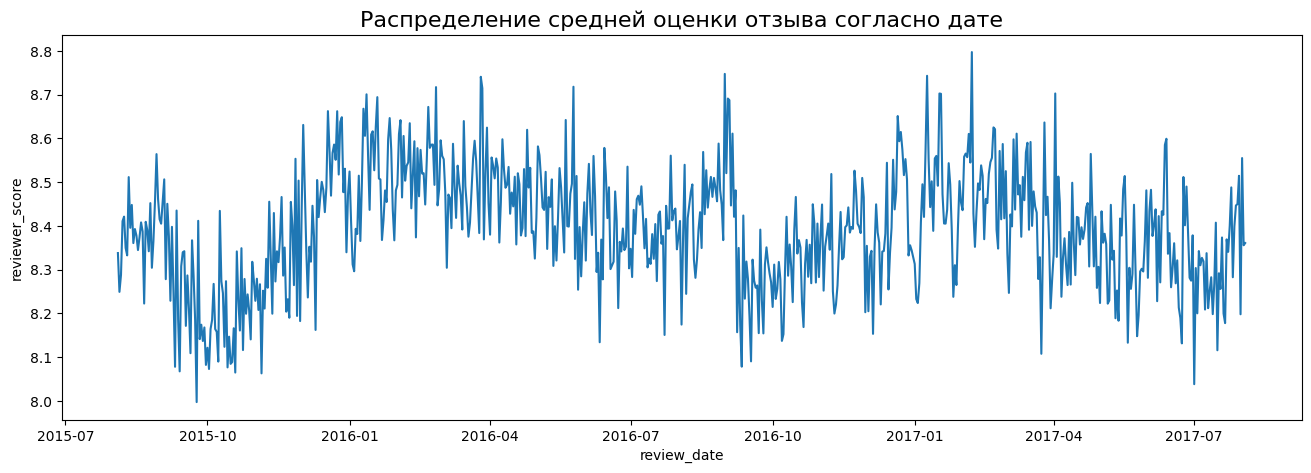

In [4016]:
date2 = hotels.groupby('review_date')['reviewer_score'].mean()
line,ax = plt.subplots(figsize=(16, 5)) 
ax = sns.lineplot(data=date2)
ax.set_title('Распределение средней оценки отзыва согласно дате', fontsize=16)

Данный график тоже относительно ровный. Наблюдается т.н. "сезонность". Почему-то рейтинг отзывов, оставленных осенью заметно ниже отзывов, оставленных весной.

Text(0.5, 1.0, 'Распределение количества отзывов согласно оценкам')

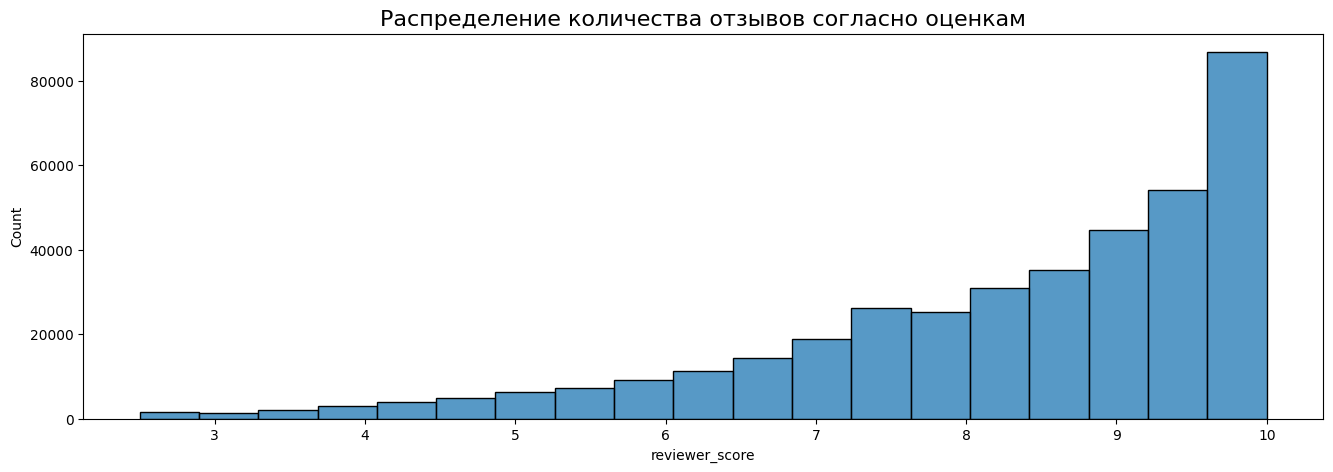

In [4017]:
line,ax = plt.subplots(figsize=(16, 5)) 
ax = sns.histplot(data=hotels,x='reviewer_score', bins=19)
ax.set_title('Распределение количества отзывов согласно оценкам', fontsize=16)

Как и ожидалось, большинство гостей остафили своим отелям положительные отзывы.

Создадим ещё один числовой признак, а именно код страны гостя, оставившего отзыв отелю.

In [4018]:
country = pd.read_csv('data/country-codes.csv')

In [4019]:
# Оставляем два стобца с буквенным и числовым кодом страны согласно стандарту ISO
country = country.drop(columns=country.iloc[:, 6:]) 
country = country.drop(columns=country.iloc[:, 3:5])
country = country.drop(columns=country.iloc[:, 0:2]) 
country.head()

,ISO3166-1-Alpha-3,ISO3166-1-numeric
0,TWN,158.0
1,AFG,4.0
2,ALB,8.0
3,DZA,12.0
4,ASM,16.0


In [4020]:
# Добавим данную таблицу к нашей
hotels = hotels.merge(country, left_on='country_code', right_on='ISO3166-1-Alpha-3', how='left')

In [4021]:
hotels['ISO3166-1-numeric'] = hotels['ISO3166-1-numeric'].astype(int)

In [4022]:
hotels = hotels.rename(columns={'ISO3166-1-Alpha-3': 'reviewer_country_code', 'ISO3166-1-numeric': 'reviewer_country_numeric_code'})

In [4023]:
hotels['review_date'] = pd.to_datetime(hotels['review_date'], format='%Y%m%d').dt.strftime('%Y%m%d')

Создаём признак месяца отзыва

In [4024]:
hotels['review_month'] = hotels['review_date'].apply(lambda x: x[4:6])

In [4026]:
hotels['review_year'] = hotels['review_date'].apply(lambda x: x[:4])

Преобразуем признак месяца и года к числовому формату

In [4027]:
hotels['review_date'] = hotels['review_date'].astype(int)
hotels['review_year'] = hotels['review_year'].astype(int)
hotels['review_month'] = hotels['review_month'].astype(int)

Теперь нам необходимо заполнить пропуски в данных

In [4028]:
# Выясняем, в каких странах больше всего пропусков
nulls = hotels[hotels.isna().any(axis=1)]
nulls['hotel_country_code'].value_counts()

AUT    1990
FRA     299
ESP     159
Name: hotel_country_code, dtype: int64

In [4029]:
# Заполняем пропуски средним значение широты и долготы отелей из той же страны
hotels['lat'] = hotels['lat'].fillna(hotels.groupby('hotel_country_code')['lat'].transform('median'))
hotels['lng'] = hotels['lng'].fillna(hotels.groupby('hotel_country_code')['lng'].transform('median'))

In [4030]:
hotels['days_since_review'] = hotels['days_since_review'].str.split().str[0]
hotels['days_since_review']

0         531
1         203
2         289
3         681
4         516
         ... 
386798    106
386799    171
386800    543
386801     74
386802    363
Name: days_since_review, Length: 386803, dtype: object

In [4031]:
hotels['days_since_review'] = hotels['days_since_review'].astype(int)

C:\Users\Michael Brown\AppData\Local\Temp\ipykernel_10200\3651535160.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

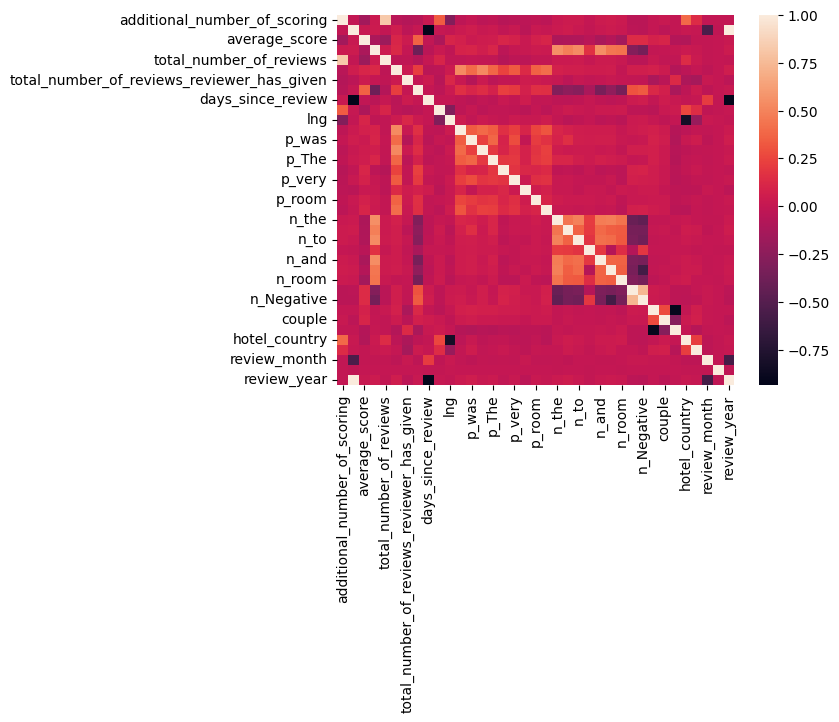

In [4032]:
sns.heatmap(hotels.corr())

In [4033]:
hotels.corr().sort_values(by='reviewer_score')

C:\Users\Michael Brown\AppData\Local\Temp\ipykernel_10200\3424851269.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,additional_number_of_scoring,review_date,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,days_since_review,lat,...,n_No,n_Negative,leisure_trip,couple,business_trip,hotel_country,reviewer_country_numeric_code,review_month,review_day,review_year
review_total_negative_word_counts,0.029536,0.039590,-0.113152,1.000000,0.035233,0.119284,0.001804,-0.383407,-0.042077,0.019437,...,-0.288645,-0.358294,-0.007579,-0.003940,0.005361,0.028274,0.013302,-0.009451,-0.003040,0.038963
n_room,0.026616,0.019308,-0.144065,0.428918,0.017825,-0.009747,0.002530,-0.343890,-0.021086,0.039767,...,-0.305008,-0.351276,-0.028847,-0.010747,0.027606,0.043519,-0.001760,-0.003028,-0.004624,0.018930
n_and,0.039514,0.023393,-0.123751,0.542215,0.036952,0.042890,-0.001812,-0.339878,-0.025379,0.027280,...,-0.317823,-0.339029,-0.017588,-0.006204,0.016164,0.039941,0.019591,-0.004489,-0.000689,0.022968
n_the,0.021587,0.029420,-0.102408,0.550473,0.033153,0.073561,0.005870,-0.295336,-0.029369,0.010183,...,-0.407068,-0.442412,-0.008165,-0.006904,0.007422,0.018708,0.000994,-0.011206,-0.005048,0.029162
n_to,0.033754,0.022717,-0.089597,0.536620,0.037218,0.058203,0.003830,-0.274399,-0.024986,0.024376,...,-0.329546,-0.380986,-0.006774,-0.001442,0.004893,0.030767,0.011715,-0.003299,-0.003537,0.022256
n_was,0.037841,0.041938,-0.100516,0.479789,0.028081,0.061390,-0.035688,-0.243428,-0.040623,0.036320,...,-0.350698,-0.356328,0.009128,0.012698,-0.009502,0.048123,0.039850,-0.019290,-0.002943,0.041726
n_in,0.042372,0.033875,-0.078093,0.441560,0.037748,0.055135,0.011857,-0.236440,-0.035393,0.026398,...,-0.341380,-0.585920,-0.005390,0.006797,0.004260,0.039908,0.036156,-0.009728,-0.000798,0.033416
n_a,0.000514,-0.009925,-0.052351,0.163444,0.008033,0.043830,-0.015819,-0.117423,0.010908,0.004746,...,-0.077123,0.189057,-0.003224,0.002034,0.007802,0.003767,-0.005370,0.002102,-0.004932,-0.009748
business_trip,-0.004824,-0.008305,-0.072968,0.005361,-0.015851,-0.075133,0.129854,-0.113428,0.011942,0.038501,...,-0.032435,-0.027113,-0.904145,-0.278014,1.000000,0.001061,-0.059423,-0.005422,0.001634,-0.007814
total_number_of_reviews,0.824467,-0.004767,-0.180213,0.035233,1.000000,-0.029557,-0.025708,-0.073389,0.007827,0.101131,...,-0.046464,-0.042898,0.014728,-0.012954,-0.015851,0.133868,0.028974,-0.005048,-0.002870,-0.004386


In [4034]:
# Удаляем ненужные признаки
hotels = hotels.drop('hotel_country', axis=1)
hotels = hotels.drop('review_date', axis=1)
#hotels = hotels.drop('additional_number_of_scoring', axis=1)
#hotels = hotels.drop('total_number_of_reviews_reviewer_has_given', axis=1)
#hotels = hotels.drop('days_since_review', axis=1)
#hotels = hotels.drop('lat', axis=1)
#hotels = hotels.drop('lng', axis=1)
hotels = hotels.drop('total_number_of_reviews', axis=1)
hotels = hotels.drop('review_year', axis=1)
hotels = hotels.drop('review_month', axis=1)

In [4035]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386803 entries, 0 to 386802
Data columns (total 39 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                386803 non-null  int64  
 1   average_score                               386803 non-null  float64
 2   review_total_negative_word_counts           386803 non-null  int64  
 3   review_total_positive_word_counts           386803 non-null  int64  
 4   total_number_of_reviews_reviewer_has_given  386803 non-null  int64  
 5   reviewer_score                              386803 non-null  float64
 6   days_since_review                           386803 non-null  int32  
 7   lat                                         386803 non-null  float64
 8   lng                                         386803 non-null  float64
 9   hotel_name_n                                386803 non-null  object 
 

In [4036]:
# # убираем признаки которые еще не успели обработать, 
# # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
object_columns = [s for s in hotels.columns if hotels[s].dtypes == 'object']
hotels.drop(object_columns, axis = 1, inplace=True)

# # заполняем пропуски самым простым способом
hotels = hotels.fillna(0)

In [4037]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)  
X = hotels.drop(['reviewer_score'], axis = 1)  
y = hotels['reviewer_score'] 

In [4038]:
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  

In [4039]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [4040]:
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
  
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test) 

In [4041]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.13064174385637584


MAPE: 0.13060315094552988\
MAPE: 0.13124615438700943\
MAPE: 0.13131213548901946\
MAPE: 0.1313918160524217\
MAPE: 0.1314654274582464\
MAPE: 0.13184410810959696\
MAPE: 0.13190213872218476\
MAPE: 0.13205058703160766\
MAPE: 0.13279829003203056\
MAPE: 0.13370223210063753\
MAPE: 0.13395231619153553\
MAPE: 0.13432011939774516\
MAPE: 0.13516724023673948\
MAPE: 0.13545920477743334\
MAPE: 0.13565849495123164\
MAPE: 0.13586721614026914\
MAPE: 0.13601731454428428\
MAPE: 0.13642866495303185\
MAPE: 0.136940436475685\
MAPE: 0.13714290876967394\
MAPE: 0.1373172207981428\
MAPE: 0.1373541856317374\
MAPE: 0.1378574196778373